
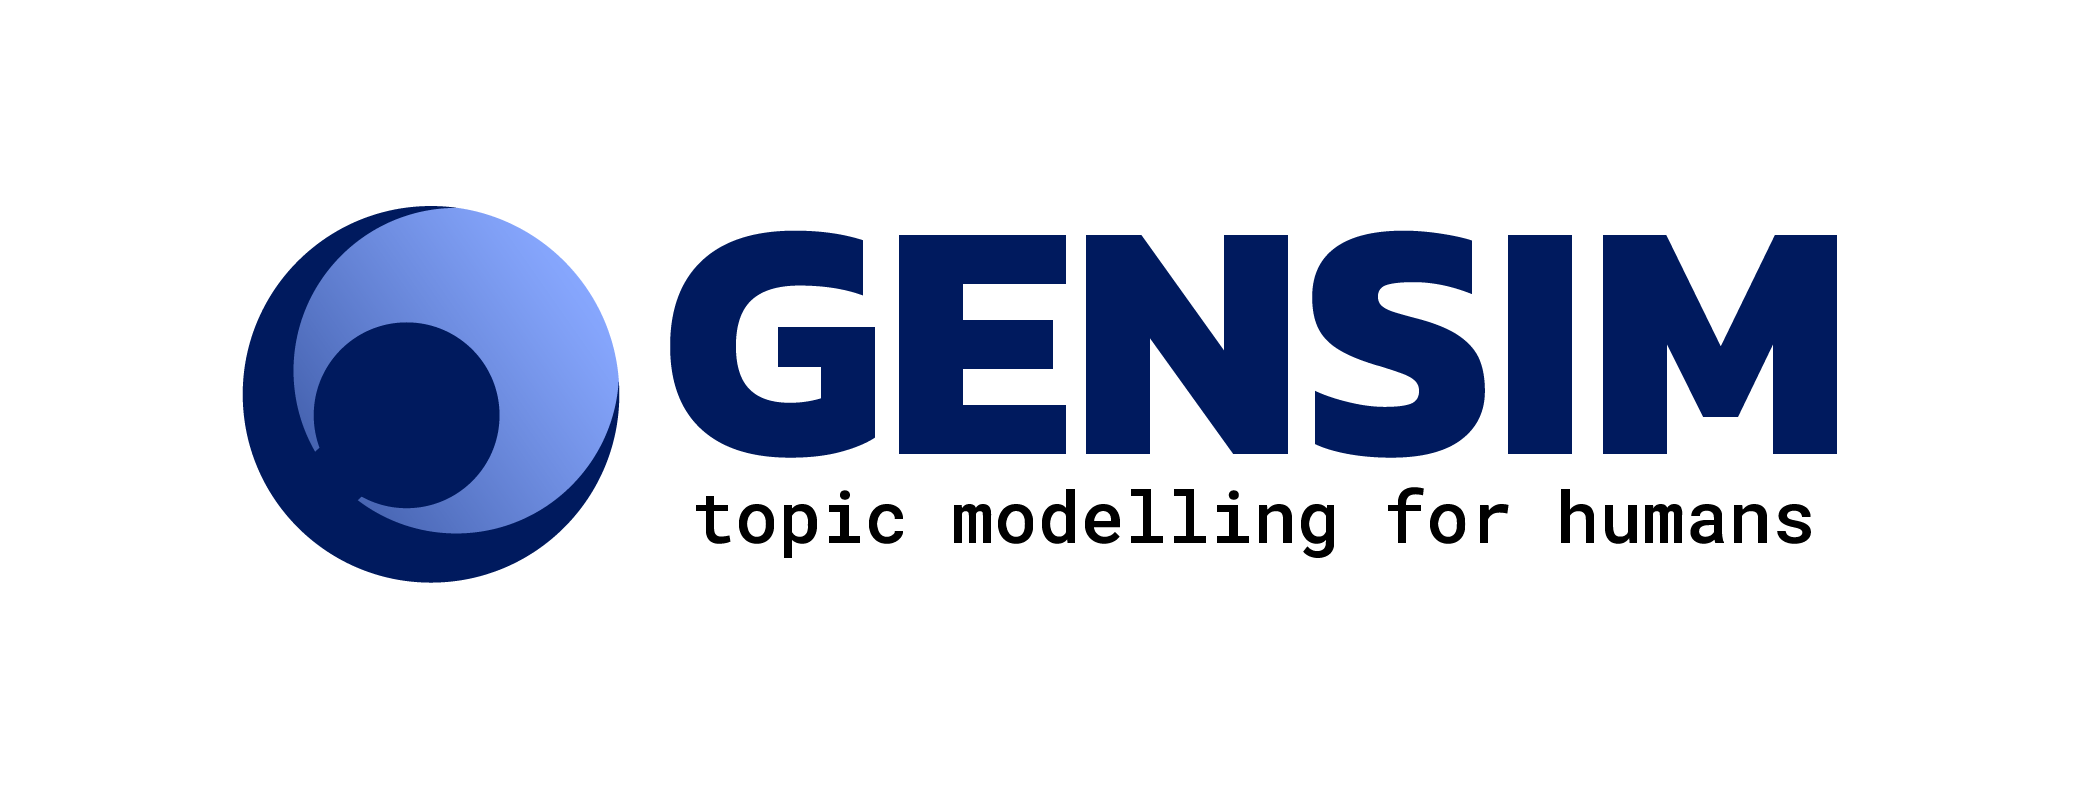

#Gensim = “Generate Similar”
Gensim : a free open-source Python library for **representing documents as semantic vectors**.
https://radimrehurek.com/gensim/index.html

Gensim is designed to process raw, unstructured digital texts ("plain text" or "corpus of plain text documents") using unsupervised machine learning algorithms.

The algorithms such as **Word2Vec**, **FastText**, Latent Semantic Indexing (LSI, LSA, LsiModel), Latent Dirichlet Allocation (LDA, LdaModel) are available in Gensim.

These algorithm **automatically discover the semantic structure** of documents.

They examining **statistical co-occurrence patterns** within a corpus of training documents. 


Ref:

1.   https://radimrehurek.com/gensim/intro.html



In [1]:
#pip install --upgrade gensim

In [2]:
pip install gensim==4.0.1

     |████████████████████████████████| 23.9 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
%cd /content/gdrive/MyDrive/NLP2021/WordEmbeddings

/content/gdrive/MyDrive/NLP2021/WordEmbeddings


#Pre-processing Functions

In [5]:
def normalize(text):
    return(text.lower())

In [6]:
import re
def removenumbers(text):
    text = re.sub("\d+", "", text)
    return text

In [7]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

def makesentences(text):
    s = re.sub("\n", " ", text)
    s = sent_tokenize(s)
    temp=[]
    for sen in s:
        temp.append(re.sub("\W", " ", sen))
    return temp

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
def preprocess(text):
    text = normalize(text)
    text = removenumbers(text)
    text = makesentences(text)
    return(text)

In [9]:
#def sandhi(text)

#Load the corpus

In [10]:
#The Mahabharata corpus is taken form the following website:
#https://www.sacred-texts.com/hin/maha/ 
data=[]
n=19 #18 Texts of Mahabharatha
for i in range(1,n):
    path="mb/maha"+str(i) + '.txt'
    #print(path)
    file = open(path)
    lines = file.read()
    doc = preprocess(lines)
    data.append(doc)

In [11]:
sent= []
for doc in data:
    for s in doc:
        sent.append(s.split()) 
        
print(len(sent))
print(sent[9990])

131541
['vaisampayana', 'continued', 'then', 'the', 'illustrious', 'vyasa', 'addressing', 'yudhishthira', 'the', 'just', 'said', 'this', 'day', 'is', 'an', 'auspicious', 'day', 'o', 'son', 'of', 'pandu']


#Word2Vec


Installation: https://pypi.org/project/gensim/

https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [1]:
from gensim.models import Word2Vec

* CBoW
* Skipgram

In [13]:
##Only once
import time
start = time.time()
cbow = Word2Vec(sent,vector_size = 50, window = 5, sg = 0) #sg=0 -CBoW - gensim 4
#cbow = Word2Vec(sent,size = 50, window = 5, sg = 0) #older version of gensim 3
end = time.time()
end-start


19.502004146575928

In [14]:
cbow.save("cbow.model")

In [2]:
cbow2=Word2Vec.load("cbow.model")

FileNotFoundError: ignored

In [16]:
#KeyedVectors model.
#Word2Vec.wv --> KeyedVectors

In [17]:
words = ['draupadi','krishna','king','arjuna','pandavas','kunti','duryodhana']
for i in range(len(words)):
    print(words[i], end="\t==>  ")
    similar = cbow.wv.most_similar(words[i], topn = 5)
    for j in range(len(similar)):
        print(similar[j][0],end =", ")
    print("\n")

draupadi	==>  drupada, madri, virata, subhadra, dussasana, 

krishna	==>  kesava, vasudeva, govinda, janardana, keshava, 

king	==>  monarch, janardana, madhava, sire, bharata, 

arjuna	==>  bhima, karna, dhananjaya, bhimasena, partha, 

pandavas	==>  kauravas, parthas, kurus, dhartarashtras, pancalas, 

kunti	==>  pritha, pandu, radha, dharma, adhiratha, 

duryodhana	==>  karna, satyaki, bhima, yudhishthira, yuyudhana, 



In [18]:
##Only Once
start = time.time()
skipgram = Word2Vec(sent, vector_size = 50, window = 5, sg = 1) #skipgram
#skipgram = Word2Vec(sent, size = 50, window = 5, sg = 1)
end = time.time()
end-start

54.95967721939087

In [19]:
skipgram.save('skipgram.model')

In [20]:
skipgram=Word2Vec.load("skipgram.model")

In [21]:
for i in range(len(words)):
    print(words[i], end="\t==>  ")
    similar = skipgram.wv.most_similar(words[i], topn = 5)
    for j in range(len(similar)):
        print(similar[j][0],end =", ")
    print("\n")

draupadi	==>  virata, drupada, madri, kekaya, princess, 

krishna	==>  kesava, vasudeva, hrishikesa, keshava, govinda, 

king	==>  monarch, yudhishthira, yudhisthira, sire, kanika, 

arjuna	==>  dhananjaya, phalguna, partha, karna, bhima, 

pandavas	==>  kauravas, dhartarashtras, srinjayas, parthas, somakas, 

kunti	==>  pritha, pandu, radha, suta, subhadra, 

duryodhana	==>  karna, duhshasana, dussasana, shalya, suyodhana, 



In [22]:
skipgram.wv.most_similar('krishna')

[('kesava', 0.90433269739151),
 ('vasudeva', 0.8794889450073242),
 ('hrishikesa', 0.8615850806236267),
 ('keshava', 0.8596987724304199),
 ('govinda', 0.8534201383590698),
 ('janardana', 0.8532354831695557),
 ('achyuta', 0.8486089110374451),
 ('vibhatsu', 0.8323512673377991),
 ('dhananjaya', 0.8217469453811646),
 ('devaki', 0.8181855082511902)]

In [26]:
cbow.wv.most_similar('krishna')

[('kesava', 0.8685056567192078),
 ('vasudeva', 0.8374661207199097),
 ('govinda', 0.7937043309211731),
 ('janardana', 0.7902349829673767),
 ('keshava', 0.779438853263855),
 ('dhananjaya', 0.7711703181266785),
 ('partha', 0.7309157252311707),
 ('rama', 0.7197503447532654),
 ('madhava', 0.7150858640670776),
 ('shalya', 0.7084656357765198)]

#Visualising Word Embeddings
https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#visualising-word-embeddings

In [24]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [25]:
start=time.time()
x_vals, y_vals, labels = reduce_dimensions(skipgram)
end=time.time()
end-start

KeyboardInterrupt: ignored

In [ ]:
def plot_with_matplotlib(x_vals, y_vals, labels,x,y,r):
    import matplotlib.pyplot as plt
    import random

    random.seed()

    plt.figure(figsize=(x, y))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 100 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, r)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [ ]:
%matplotlib inline

In [ ]:
plot_with_matplotlib(x_vals, y_vals, labels,200,200,1500)